## Delhivery - Feature Engineering

#Business Statement

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('delhivery_data.csv')
data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

##Basic Data Exploration

In [ ]:
data.shape

(144867, 24)

The data has 144867 rows and 24 columns

In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
data.describe()

start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.119294       1.715421   
min         9.000000       6.000000       9.008200       0.144000   
25%        51.000000      27.000000      29.914700       1.604264   
50%       132.000000      64.000000      78.525800       1.857143   
75%       513.000000     257.000000     343.193250       2.213483   
max      4532.000000    1686.000000    2326.199100      77.387097   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
count        144867.000000      144867.000000           144867.00000   
mean             36.196111          18.507548               22.82902   
std              53.571158          14.775960               17.86066   
min            -244.000000           0.000000                0.00000   
25%              20.000000          11.000000               12.07010   
50%              29.000000          17.000000               23.51300   
75%              40.000000          22.000000               27.81325   
max            3051.000000        1611.000000             2191.40370   

       segment_factor  
count   144867.000000  
mean         2.218368  
std          4.847530  
min        -23.444444  
25%          1.347826  
50%          1.684211  
75%          2.250000  
max        574.250000

In [ ]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

##Seperating Categorical and Numerical data

In [ ]:
data.describe(include=['object'])

data          trip_creation_time  \
count     144867                      144867   
unique         2                       14817   
top     training  2018-09-28 05:23:15.359220   
freq      104858                         101   

                                      route_schedule_uuid route_type  \
count                                              144867     144867   
unique                                               1504          2   
top     thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...        FTL   
freq                                                 1812      99660   

                      trip_uuid source_center                    source_name  \
count                    144867        144867                         144574   
unique                    14817          1508                           1498   
top     trip-153811219535896559  IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                        101         23347                          23347   

       destination_center               destination_name  \
count              144867                         144606   
unique               1481                           1468   
top          IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                15192                          15192   

                     od_start_time                 od_end_time  \
count                       144867                      144867   
unique                       26369                       26369   
top     2018-09-21 18:37:09.322207  2018-09-24 09:59:15.691618   
freq                            81                          81   

           cutoff_timestamp  
count                144867  
unique                93180  
top     2018-09-24 05:19:20  
freq                     40

In [ ]:
cat_col=data.dtypes=='object'
category=list(cat_col[cat_col].index)
num_col = data.dtypes!='object'
numerical=list(num_col[num_col].index)

In [ ]:
category_data=data[category]
category_data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

             cutoff_timestamp  
0         2018-09-20 04:27:55  
1         2018-09-20 04:17:55  
2  2018-09-20 04:01:19.505586  
3         2018-09-20 03:39:57  
4         2018-09-20 03:33:55

In [ ]:
numerical_data=data[numerical]
numerical_data.head()

start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0                    86.0       True              9   
1                    86.0       True             18   
2                    86.0       True             27   
3                    86.0       True             36   
4                    86.0      False             39   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       10.435660         14.0       11.0        11.9653   
1                       18.936842         24.0       20.0        21.7243   
2                       27.637279         40.0       28.0        32.5395   
3                       36.118028         62.0       40.0        45.5620   
4                       39.386040         68.0       44.0        54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000

In [ ]:
for c in category_data.columns:
  print(f"{c} : {category_data[c].nunique()}")

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
cutoff_timestamp : 93180


Converting the categorical columns of dates  to DateTime

In [ ]:
data['trip_creation_time']=pd.to_datetime(data['trip_creation_time'])
data['od_start_time']=pd.to_datetime(data['od_start_time'])
data['od_end_time']=pd.to_datetime(data['od_end_time'])
data['cutoff_timestamp']=pd.to_datetime(data['cutoff_timestamp'],format='mixed')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

No of unique values in each column

In [ ]:
for col in data.columns:
    print(f"{col} : {data[col].nunique()}")

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


##Handling Missing data

In [ ]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
def missing(data):
  total_missing_df = data.isnull().sum().sort_values(ascending =False)
  percent_missing_df = ((data.isnull().sum()/len(data))*100).sort_values(ascending=False)
  missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percentage'])
  return missing_data_df

In [ ]:
missing_data = missing(data)
missing_data[missing_data['Total'] > 0]

Total  Percentage
source_name         293    0.202254
destination_name    261    0.180165

- Source name has .20 percent of mising values
- destination_name has 0.18 percent of missing values

We'll try to impute this through mode imputation

In [ ]:
from sklearn.impute import SimpleImputer

cat_to_impute = ['source_name','destination_name']
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for c in cat_to_impute:
  data[c] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[c])))

In [ ]:
missing(data)

Total  Percentage
data                                0         0.0
trip_creation_time                  0         0.0
segment_osrm_distance               0         0.0
segment_osrm_time                   0         0.0
segment_actual_time                 0         0.0
factor                              0         0.0
osrm_distance                       0         0.0
osrm_time                           0         0.0
actual_time                         0         0.0
actual_distance_to_destination      0         0.0
cutoff_timestamp                    0         0.0
cutoff_factor                       0         0.0
is_cutoff                           0         0.0
start_scan_to_end_scan              0         0.0
od_end_time                         0         0.0
od_start_time                       0         0.0
destination_name                    0         0.0
destination_center                  0         0.0
source_name                         0         0.0
source_center                       0         0.0
trip_uuid                           0         0.0
route_type                          0         0.0
route_schedule_uuid                 0         0.0
segment_factor                      0         0.0

##Merging and Aggregation

Merging and aggregating the above data based on  Trip_uuid, Source ID and Destination ID

In [ ]:
data_copy = data

In [ ]:
data_merge= data_copy.groupby(['trip_uuid','source_center','destination_center']).agg({'data':'first',
                                                                             'trip_creation_time':'first',
                                                                            'route_schedule_uuid':'first',
                                                                             'route_type':'first',
                                                                             'source_name':'first',
                                                                             'destination_name':'last',
                                                                             'od_start_time':'first',
                                                                             'od_end_time':'last',
                                                                             'start_scan_to_end_scan':'max',
                                                                             'actual_distance_to_destination':'max',
                                                                             'actual_time':'max',
                                                                             'osrm_time':'max',
                                                                             'osrm_distance':'max',
                                                                             'segment_actual_time':'sum',
                                                                             'segment_osrm_time':'sum',
                                                                             'segment_osrm_distance':'sum'}).reset_index()
data_merge

trip_uuid source_center destination_center      data  \
0      trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1      trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2      trip-153671042288605164  IND561203AAB       IND562101AAA  training   
3      trip-153671042288605164  IND572101AAA       IND561203AAB  training   
4      trip-153671043369099517  IND000000ACB       IND160002AAC  training   
...                        ...           ...                ...       ...   
26363  trip-153861115439069069  IND628204AAA       IND627657AAA      test   
26364  trip-153861115439069069  IND628613AAA       IND627005AAA      test   
26365  trip-153861115439069069  IND628801AAA       IND628204AAA      test   
26366  trip-153861118270144424  IND583119AAA       IND583101AAA      test   
26367  trip-153861118270144424  IND583201AAA       IND583119AAA      test   

              trip_creation_time  \
0     2018-09-12 00:00:16.535741   
1     2018-09-12 00:00:16.535741   
2     2018-09-12 00:00:22.886430   
3     2018-09-12 00:00:22.886430   
4     2018-09-12 00:00:33.691250   
...                          ...   
26363 2018-10-03 23:59:14.390954   
26364 2018-10-03 23:59:14.390954   
26365 2018-10-03 23:59:14.390954   
26366 2018-10-03 23:59:42.701692   
26367 2018-10-03 23:59:42.701692   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1      thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
2      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
3      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
4      thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   
...                                                  ...        ...   
26363  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
26364  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
26365  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
26366  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   
26367  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   

                              source_name  \
0      Kanpur_Central_H_6 (Uttar Pradesh)   
1      Bhopal_Trnsport_H (Madhya Pradesh)   
2       Doddablpur_ChikaDPP_D (Karnataka)   
3           Tumkur_Veersagr_I (Karnataka)   
4           Gurgaon_Bilaspur_HB (Haryana)   
...                                   ...   
26363  Tirchchndr_Shnmgprm_D (Tamil Nadu)   
26364   Peikulam_SriVnktpm_D (Tamil Nadu)   
26365        Eral_Busstand_D (Tamil Nadu)   
26366       Sandur_WrdN1DPP_D (Karnataka)   
26367                  Hospet (Karnataka)   

                            destination_name              od_start_time  \
0              Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46.858469   
1         Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16.535741   
2          Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09.655591   
3          Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
4             Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17.106733   
...                                      ...                        ...   
26363  Thisayanvilai_UdnkdiRD_D (Tamil Nadu) 2018-10-04 02:29:04.272194   
26364    Tirunelveli_VdkkuSrt_I (Tamil Nadu) 2018-10-04 04:16:39.894872   
26365     Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-04 01:44:53.808000   
26366                 Bellary_Dc (Karnataka) 2018-10-04 03:58:40.726547   
26367          Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 02:51:44.712656   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-13 13:40:23.123744                  1260.0   
1     2018-09-12 16:39:46.858469                   999.0   
2     2018-09-12 03:01:59.598855                    58.0   
3     2018-09-12 02:03:09.655591                   122.0   
4     2018-09-14 17:34:55.442454                   834.0   
...     

Above grouping is done based on Trip_uuid, Source ID and Destination ID and aggregation is done on 15 columns with the agenda to obtaining the required data for the analysis

In [ ]:
data_final=data_merge.groupby('trip_uuid').agg({'data':'first',
                                      'trip_creation_time':'first',
                                       'route_schedule_uuid':'first',
                                      'route_type':'first','source_center':'first',
                                      'source_name':'first',
                                      'destination_center':'last',
                                      'destination_name':'last',
                                      'od_start_time':'first',
                                      'od_end_time':'last',
                                      'start_scan_to_end_scan':'sum',
                                      'actual_distance_to_destination':'sum',
                                      'actual_time':'sum',
                                      'osrm_time':'sum',
                                      'osrm_distance':'sum',
                                      'segment_actual_time':'sum',
                                      'segment_osrm_time':'sum',
                                      'segment_osrm_distance':'sum'}).reset_index()
data_final

trip_uuid      data         trip_creation_time  \
0      trip-153671041653548748  training 2018-09-12 00:00:16.535741   
1      trip-153671042288605164  training 2018-09-12 00:00:22.886430   
2      trip-153671043369099517  training 2018-09-12 00:00:33.691250   
3      trip-153671046011330457  training 2018-09-12 00:01:00.113710   
4      trip-153671052974046625  training 2018-09-12 00:02:09.740725   
...                        ...       ...                        ...   
14812  trip-153861095625827784      test 2018-10-03 23:55:56.258533   
14813  trip-153861104386292051      test 2018-10-03 23:57:23.863155   
14814  trip-153861106442901555      test 2018-10-03 23:57:44.429324   
14815  trip-153861115439069069      test 2018-10-03 23:59:14.390954   
14816  trip-153861118270144424      test 2018-10-03 23:59:42.701692   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
2      thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting   
4      thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL   
...                                                  ...        ...   
14812  thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...    Carting   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...    Carting   
14814  thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...    Carting   
14815  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
14816  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   

      source_center                          source_name destination_center  \
0      IND209304AAA   Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA   
1      IND561203AAB    Doddablpur_ChikaDPP_D (Karnataka)       IND561203AAB   
2      IND000000ACB        Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB   
3      IND400072AAB             Mumbai Hub (Maharashtra)       IND401104AAA   
4      IND583101AAA               Bellary_Dc (Karnataka)       IND583119AAA   
...             ...                                  ...                ...   
14812  IND160002AAC       Chandigarh_Mehmdpur_H (Punjab)       IND160002AAC   
14813  IND121004AAB         FBD_Balabhgarh_DPC (Haryana)       IND121004AAA   
14814  IND208006AAA   Kanpur_GovndNgr_DC (Uttar Pradesh)       IND208006AAA   
14815  IND627005AAA  Tirunelveli_VdkkuSrt_I (Tamil Nadu)       IND628204AAA   
14816  IND583119AAA        Sandur_WrdN1DPP_D (Karnataka)       IND583119AAA   

                         destination_name              od_start_time  \
0      Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 16:39:46.858469   
1       Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 02:03:09.655591   
2           Gurgaon_Bilaspur_HB (Haryana) 2018-09-14 03:40:17.106733   
3          Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
4           Sandur_WrdN1DPP_D (Karnataka) 2018-09-12 00:02:09.740725   
...                                   ...                        ...   
14812      Chandigarh_Mehmdpur_H (Punjab) 2018-10-03 23:55:56.258533   
14813      Faridabad_Blbgarh_DC (Haryana) 2018-10-03 23:57:23.863155   
14814  Kanpur_GovndNgr_DC (Uttar Pradesh) 2018-10-04 02:51:27.075797   
14815  Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-03 23:59:14.390954   
14816       Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 03:58:40.726547   

                     od_end_time  start_scan_to_end_scan  \
0     2018-09-12 16:39:46.858469                  2259.0   
1     2018-09-12 02:03:09.655591                   180.0   
2     2018-09-14 03:40:17.106733                  3933.0   
3     2018-09-12 01:41:29.809822                   100.0   
4     2018-09-12 03:54:43.114421                   717.0   
...                          ...                     ...   
14812 2018-10-04 06:41:25.409035                   257.0   
14813 2018-10-04 00:5

Further grouping of tripuuid ensures that we have one record per trip using which we aim to create new features and perform further analysis

In [ ]:
data_final[['destination','dest_state']] = data_final['destination_name'].str.split('(', n=1, expand=True)
data_final['dest_state'] = data_final['dest_state'].str.rstrip(')')
data_final[['dest_City','dest_place','dest_code']] = data_final['destination'].str.split('_', n=2, expand=True)

In [ ]:
data_final[['source','source_state']] = data_final['source_name'].str.split('(', n=1, expand=True)
data_final['source_state'] = data_final['source_state'].str.rstrip(')')
data_final[['source_City','source_place','source_code']] = data_final['source'].str.split('_', n=2, expand=True)

In [ ]:
data_final['trip_creation_year'] =data_final['trip_creation_time'].dt.year
data_final['trip_creation_month'] =data_final['trip_creation_time'].dt.month_name()
data_final['trip_creation_day'] =data_final['trip_creation_time'].dt.day

In [ ]:
data_final

trip_uuid      data         trip_creation_time  \
0      trip-153671041653548748  training 2018-09-12 00:00:16.535741   
1      trip-153671042288605164  training 2018-09-12 00:00:22.886430   
2      trip-153671043369099517  training 2018-09-12 00:00:33.691250   
3      trip-153671046011330457  training 2018-09-12 00:01:00.113710   
4      trip-153671052974046625  training 2018-09-12 00:02:09.740725   
...                        ...       ...                        ...   
14812  trip-153861095625827784      test 2018-10-03 23:55:56.258533   
14813  trip-153861104386292051      test 2018-10-03 23:57:23.863155   
14814  trip-153861106442901555      test 2018-10-03 23:57:44.429324   
14815  trip-153861115439069069      test 2018-10-03 23:59:14.390954   
14816  trip-153861118270144424      test 2018-10-03 23:59:42.701692   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
2      thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting   
4      thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL   
...                                                  ...        ...   
14812  thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...    Carting   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...    Carting   
14814  thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...    Carting   
14815  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
14816  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   

      source_center                          source_name destination_center  \
0      IND209304AAA   Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA   
1      IND561203AAB    Doddablpur_ChikaDPP_D (Karnataka)       IND561203AAB   
2      IND000000ACB        Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB   
3      IND400072AAB             Mumbai Hub (Maharashtra)       IND401104AAA   
4      IND583101AAA               Bellary_Dc (Karnataka)       IND583119AAA   
...             ...                                  ...                ...   
14812  IND160002AAC       Chandigarh_Mehmdpur_H (Punjab)       IND160002AAC   
14813  IND121004AAB         FBD_Balabhgarh_DPC (Haryana)       IND121004AAA   
14814  IND208006AAA   Kanpur_GovndNgr_DC (Uttar Pradesh)       IND208006AAA   
14815  IND627005AAA  Tirunelveli_VdkkuSrt_I (Tamil Nadu)       IND628204AAA   
14816  IND583119AAA        Sandur_WrdN1DPP_D (Karnataka)       IND583119AAA   

                         destination_name              od_start_time  ...  \
0      Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 16:39:46.858469  ...   
1       Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 02:03:09.655591  ...   
2           Gurgaon_Bilaspur_HB (Haryana) 2018-09-14 03:40:17.106733  ...   
3          Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710  ...   
4           Sandur_WrdN1DPP_D (Karnataka) 2018-09-12 00:02:09.740725  ...   
...                                   ...                        ...  ...   
14812      Chandigarh_Mehmdpur_H (Punjab) 2018-10-03 23:55:56.258533  ...   
14813      Faridabad_Blbgarh_DC (Haryana) 2018-10-03 23:57:23.863155  ...   
14814  Kanpur_GovndNgr_DC (Uttar Pradesh) 2018-10-04 02:51:27.075797  ...   
14815  Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-03 23:59:14.390954  ...   
14816       Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 03:58:40.726547  ...   

      dest_place  dest_code                   source   source_state  \
0        Central       H_6       Kanpur_Central_H_6   Uttar Pradesh   
1       ChikaDPP         D    Doddablpur_ChikaDPP_D       Karnataka   
2       Bilaspur        HB      Gurgaon_Bilaspur_HB         Haryana   
3         MiraRd        IP               Mumbai Hub     Maharashtra   
4       WrdN1DPP         D               Bellary_Dc       Karnataka   
...          ..

#Data Visualization

##Training Data vs Testing Data

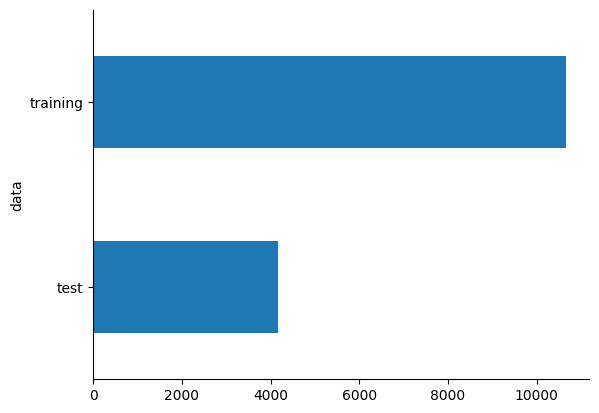

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data_final.groupby('data').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)



*   From the graph , the training data is significantly more than test data



## Route Type prefered by Delhivery

[]

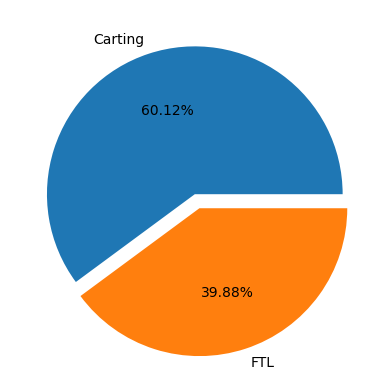

In [ ]:
plt.pie(data=data_final,x=data_final['route_type'].value_counts(),labels=['Carting','FTL'],explode=(0,0.1),autopct='%0.2f%%')
plt.plot()



*   The prefered route type is carting
*   Carting made 60% of the shipments
*   FTL made 40% of the shipments



##Comparison of distance to destination and time taken with respect to route type

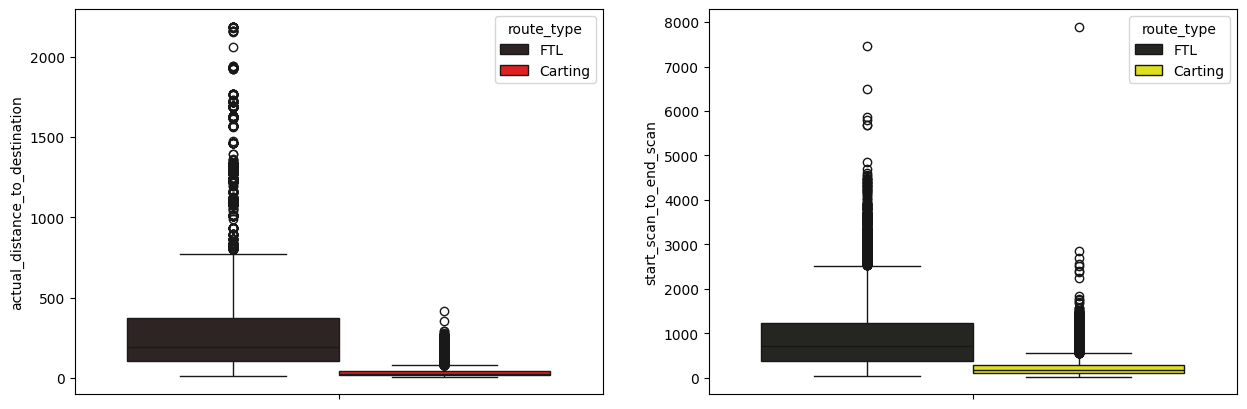

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.boxplot(data=data_final,y=data_final['actual_distance_to_destination'],hue="route_type",palette="dark:Red",ax = axis[0])
sns.boxplot(data=data_final,y=data_final['start_scan_to_end_scan'],hue="route_type",palette="dark:Yellow",ax = axis[1])
plt.show()

In [ ]:
data_final[data_final['route_type']=='Carting']['actual_distance_to_destination'].median()

27.92756600243483

In [ ]:
data_final[data_final['route_type']=='FTL']['actual_distance_to_destination'].median()

192.24584460180273

In [ ]:
data_final[data_final['route_type']=='Carting']['start_scan_to_end_scan'].median()

181.0

In [ ]:
data_final[data_final['route_type']=='FTL']['start_scan_to_end_scan'].median()

712.0

*  Carting is used for short distance delivery (median distance = 28.06)
*  FTL is used for long distnace delivery (median distance = 190.60)
*  There are many outliers in FTL for distance as well as time taken
*  The median time taken in carting 179.0
*  Median time taken in FTL is 703.0

##Trip Creation

[]

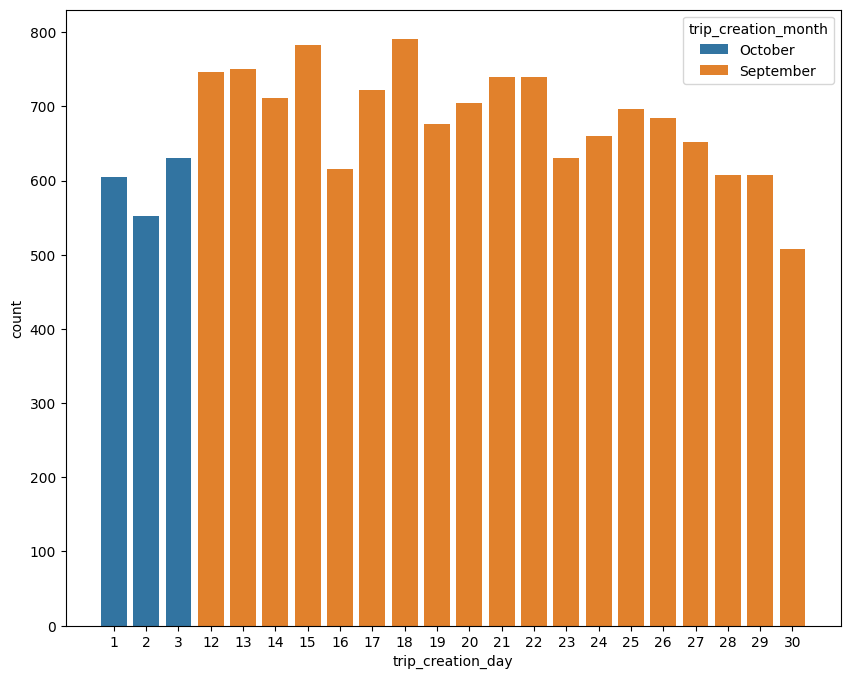

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=data_final['trip_creation_day'].sort_values(ascending=False),hue=data_final['trip_creation_month'])
plt.plot()

* Majority of the trip creation was done in September
* From 12th day to end of month there have trip in septomber

## Distance to Destination vs State

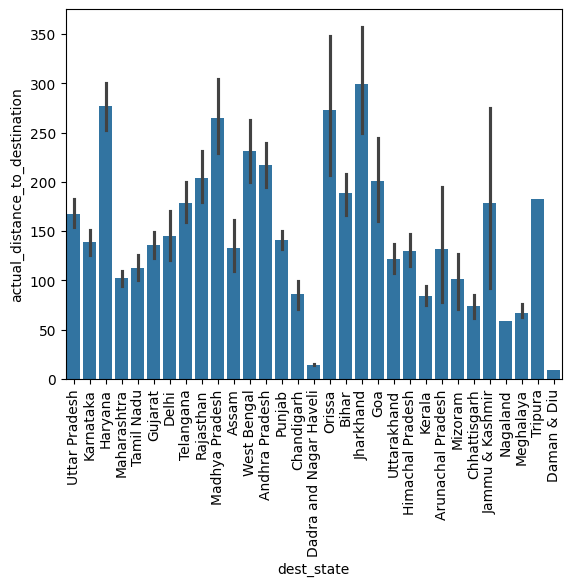

In [ ]:
sns.barplot(data=data_final,x='dest_state',y='actual_distance_to_destination')
plt.xticks(rotation=90)
plt.show()

* Jharkhand has the highest distance to destination
* Daman and Diu has the smallest actual distance to destination

##State wise destination stats

In [ ]:
data_final.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).to_frame().reset_index()

dest_state  trip_uuid
0              Maharashtra       2561
1                Karnataka       2294
2                  Haryana       1670
3               Tamil Nadu       1084
4            Uttar Pradesh        811
5                Telangana        784
6                  Gujarat        734
7              West Bengal        697
8                    Delhi        652
9                   Punjab        617
10               Rajasthan        543
11          Andhra Pradesh        442
12                   Bihar        365
13          Madhya Pradesh        358
14                  Kerala        270
15                   Assam        232
16               Jharkhand        181
17             Uttarakhand        122
18                  Orissa        119
19              Chandigarh         65
20                     Goa         52
21            Chhattisgarh         43
22        Himachal Pradesh         42
23       Arunachal Pradesh         25
24         Jammu & Kashmir         20
25  Dadra and Nagar Haveli         17
26               Meghalaya          8
27                 Mizoram          6
28                 Tripura          1
29             Daman & Diu          1
30                Nagaland          1

*  Maharsahtra , Karnataka , TamilNadu , Haryana are the 4 states where the deliveries is more than 50% of the total of deliveries in Delhivery

<Axes: xlabel='dest_state'>

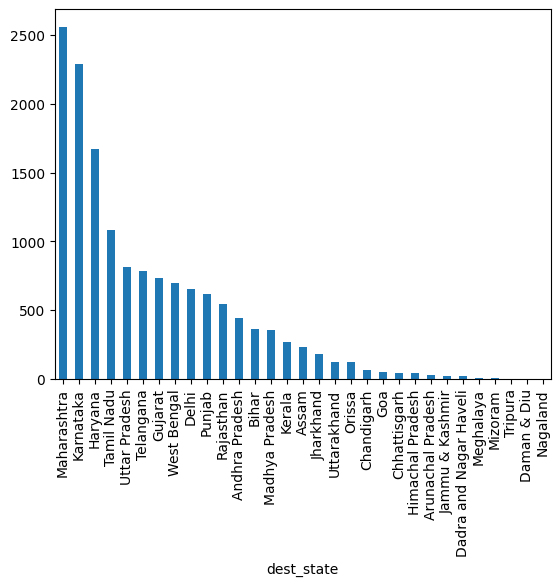

In [ ]:
data_final.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).plot(kind='bar')

* Highest deliveries done in Maharashtra state :2561
* After that karnataka : 2294

##State wise source stats

In [ ]:
data_final.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).head(10).to_frame().reset_index()

source_state  trip_uuid
0    Maharashtra       2714
1      Karnataka       2143
2        Haryana       1854
3     Tamil Nadu       1039
4      Telangana        781
5  Uttar Pradesh        762
6        Gujarat        750
7          Delhi        728
8    West Bengal        665
9         Punjab        536

The Top contributers are Maharashtra , Karnataka , Haryana , Tamil Nadu which accounts for more than 50%.

<Axes: xlabel='source_state'>

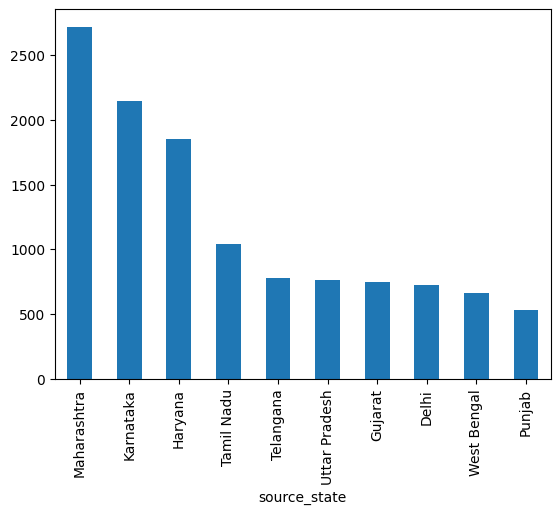

In [ ]:
data_final.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')

* Top 5 Indian states with most product delivery sources are
  * Maharashtra
  * Karnataka
  * Haryana
  * Tamil Nadu
  * Telangana

##Insights on Destination Places in each states. which place/hub has more deliveries ?


Top 10 destination places

In [ ]:
a = data_final.groupby(['dest_place','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).to_frame().reset_index()
a

dest_place   dest_state  trip_uuid
0   Bilaspur      Haryana        891
1   Nelmngla    Karnataka        548
2    Mankoli  Maharashtra        434
3   Bomsndra    Karnataka        346
4   Shamshbd    Telangana        339
5     Kundli      Haryana        320
6   Mehmdpur       Punjab        274
7   KGAirprt    Karnataka        272
8   Tathawde  Maharashtra        258
9    Dankuni  West Bengal        235

<Axes: ylabel='dest_state'>

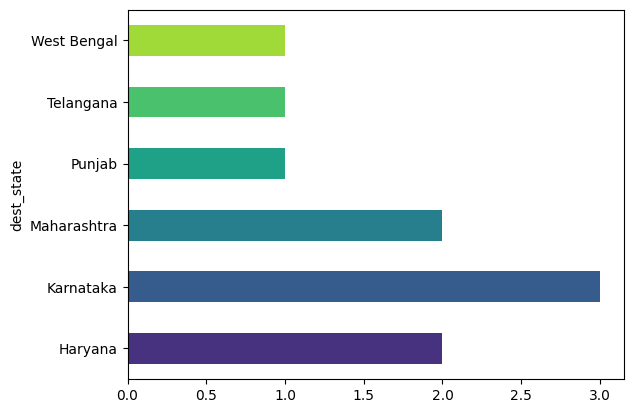

In [ ]:
a.groupby('dest_state').size().plot(kind='barh', color=sns.palettes.mpl_palette('viridis'))

*  Out fo the Top 10 places , 3 places are from Karnataka (Nelmngla,Bomsndra,KGAirport)
*  2 places are in Maharashtra & 2 are in Haryana
*  Rest of the sates have one place each


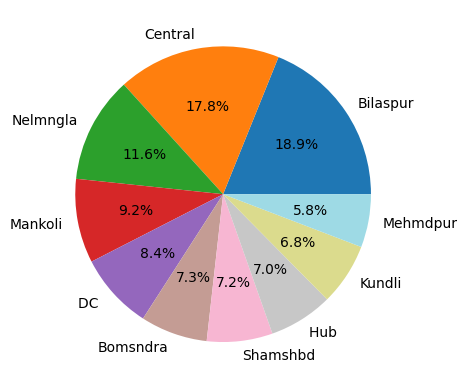

In [ ]:
data_final.groupby('dest_place')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%0.1f%%',colormap='tab20')
plt.ylabel("")
plt.show()

From this we can say that Bilaspur in Haryana owned the place of most delivered place among whole state

##Souce places in each state where the initial pickup for the delivery is taking place  

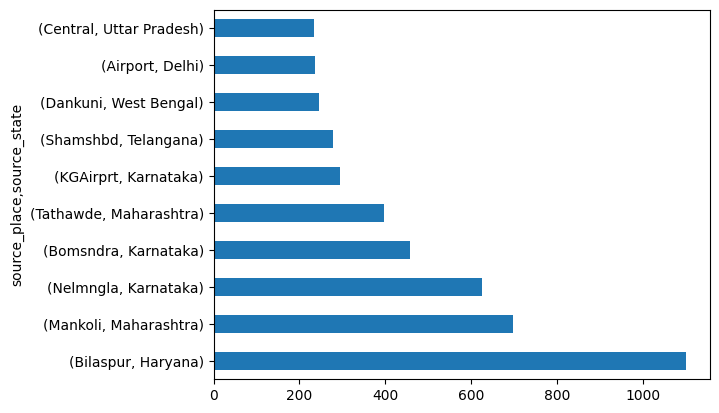

In [ ]:
data_final.groupby(['source_place','source_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

##Which City in each state has highest no of deliveries ?

In [ ]:
data_final.groupby(['dest_City','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).to_frame().reset_index()


dest_City   dest_state  trip_uuid
0  Bengaluru    Karnataka       1088
1     Mumbai  Maharashtra        966
2    Gurgaon      Haryana        904
3  Bangalore    Karnataka        551
4      Delhi        Delhi        549
5  Hyderabad    Telangana        499
6   Bhiwandi  Maharashtra        434
7    Chennai   Tamil Nadu        410
8    Sonipat      Haryana        322
9       Pune  Maharashtra        313

<Axes: ylabel='dest_City,dest_state'>

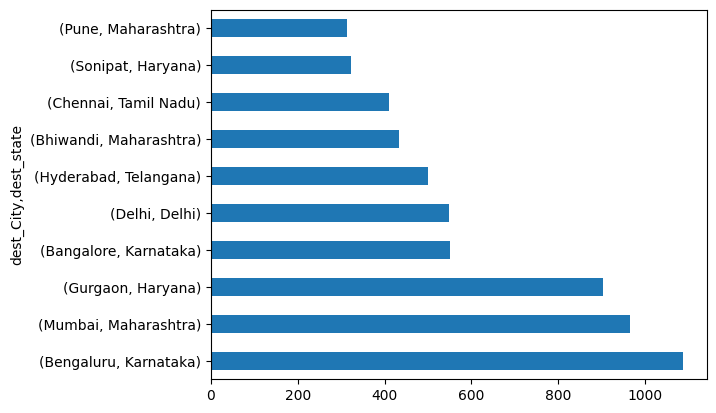

In [ ]:
data_final.groupby(['dest_City','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='barh')

##Time Taken by each route type to reach destination

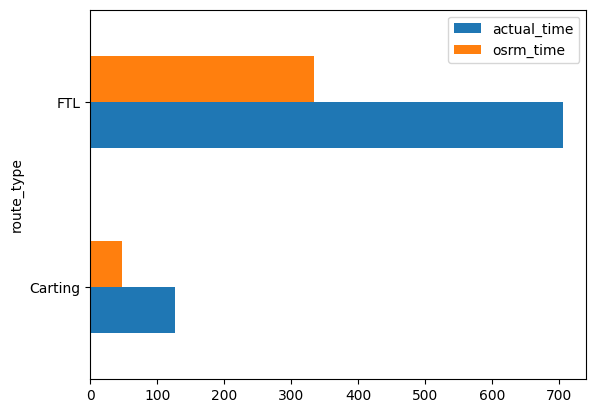

In [ ]:
data_final.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='barh')
plt.show()

Full Truck Load is the mode of transport that takes more time than the alloted(orsm time)

##Correlation between columns

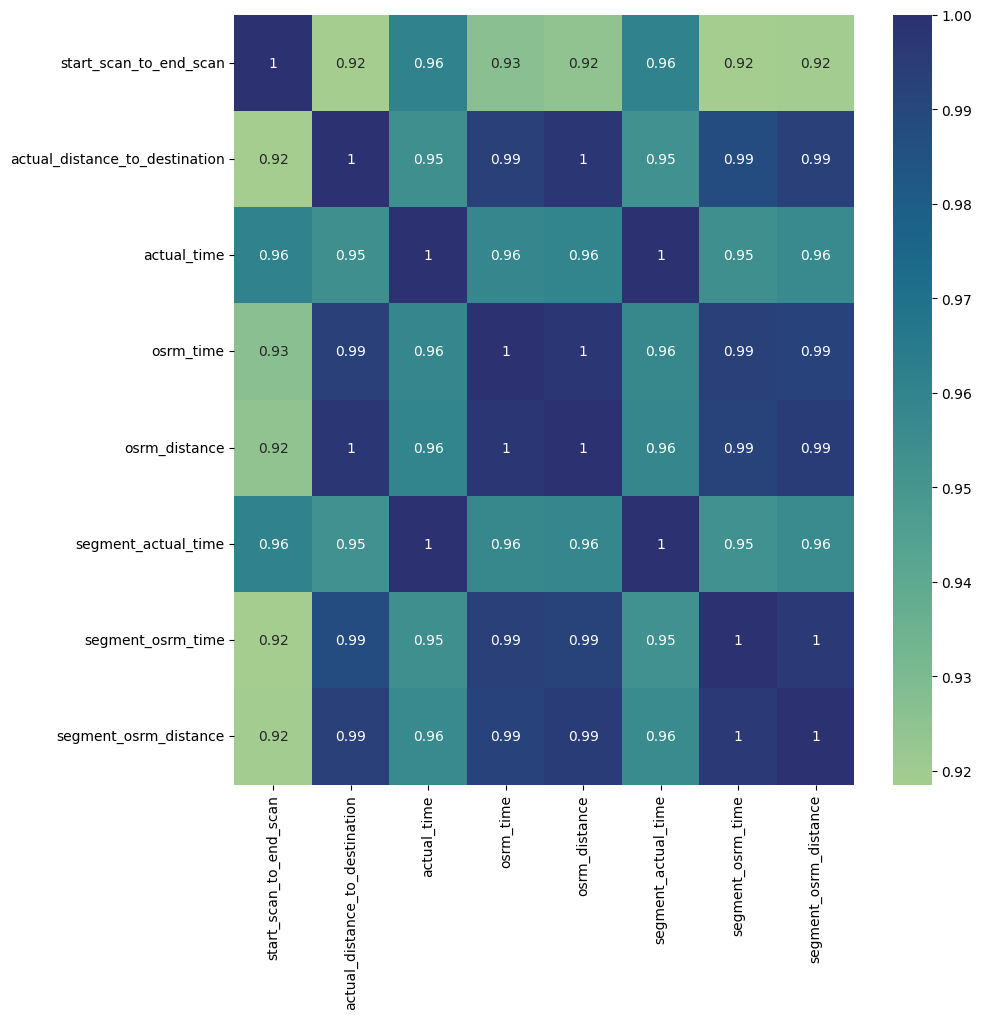

In [ ]:
numeric_cols = data_final.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_final[numeric_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True,cmap="crest")
plt.show()

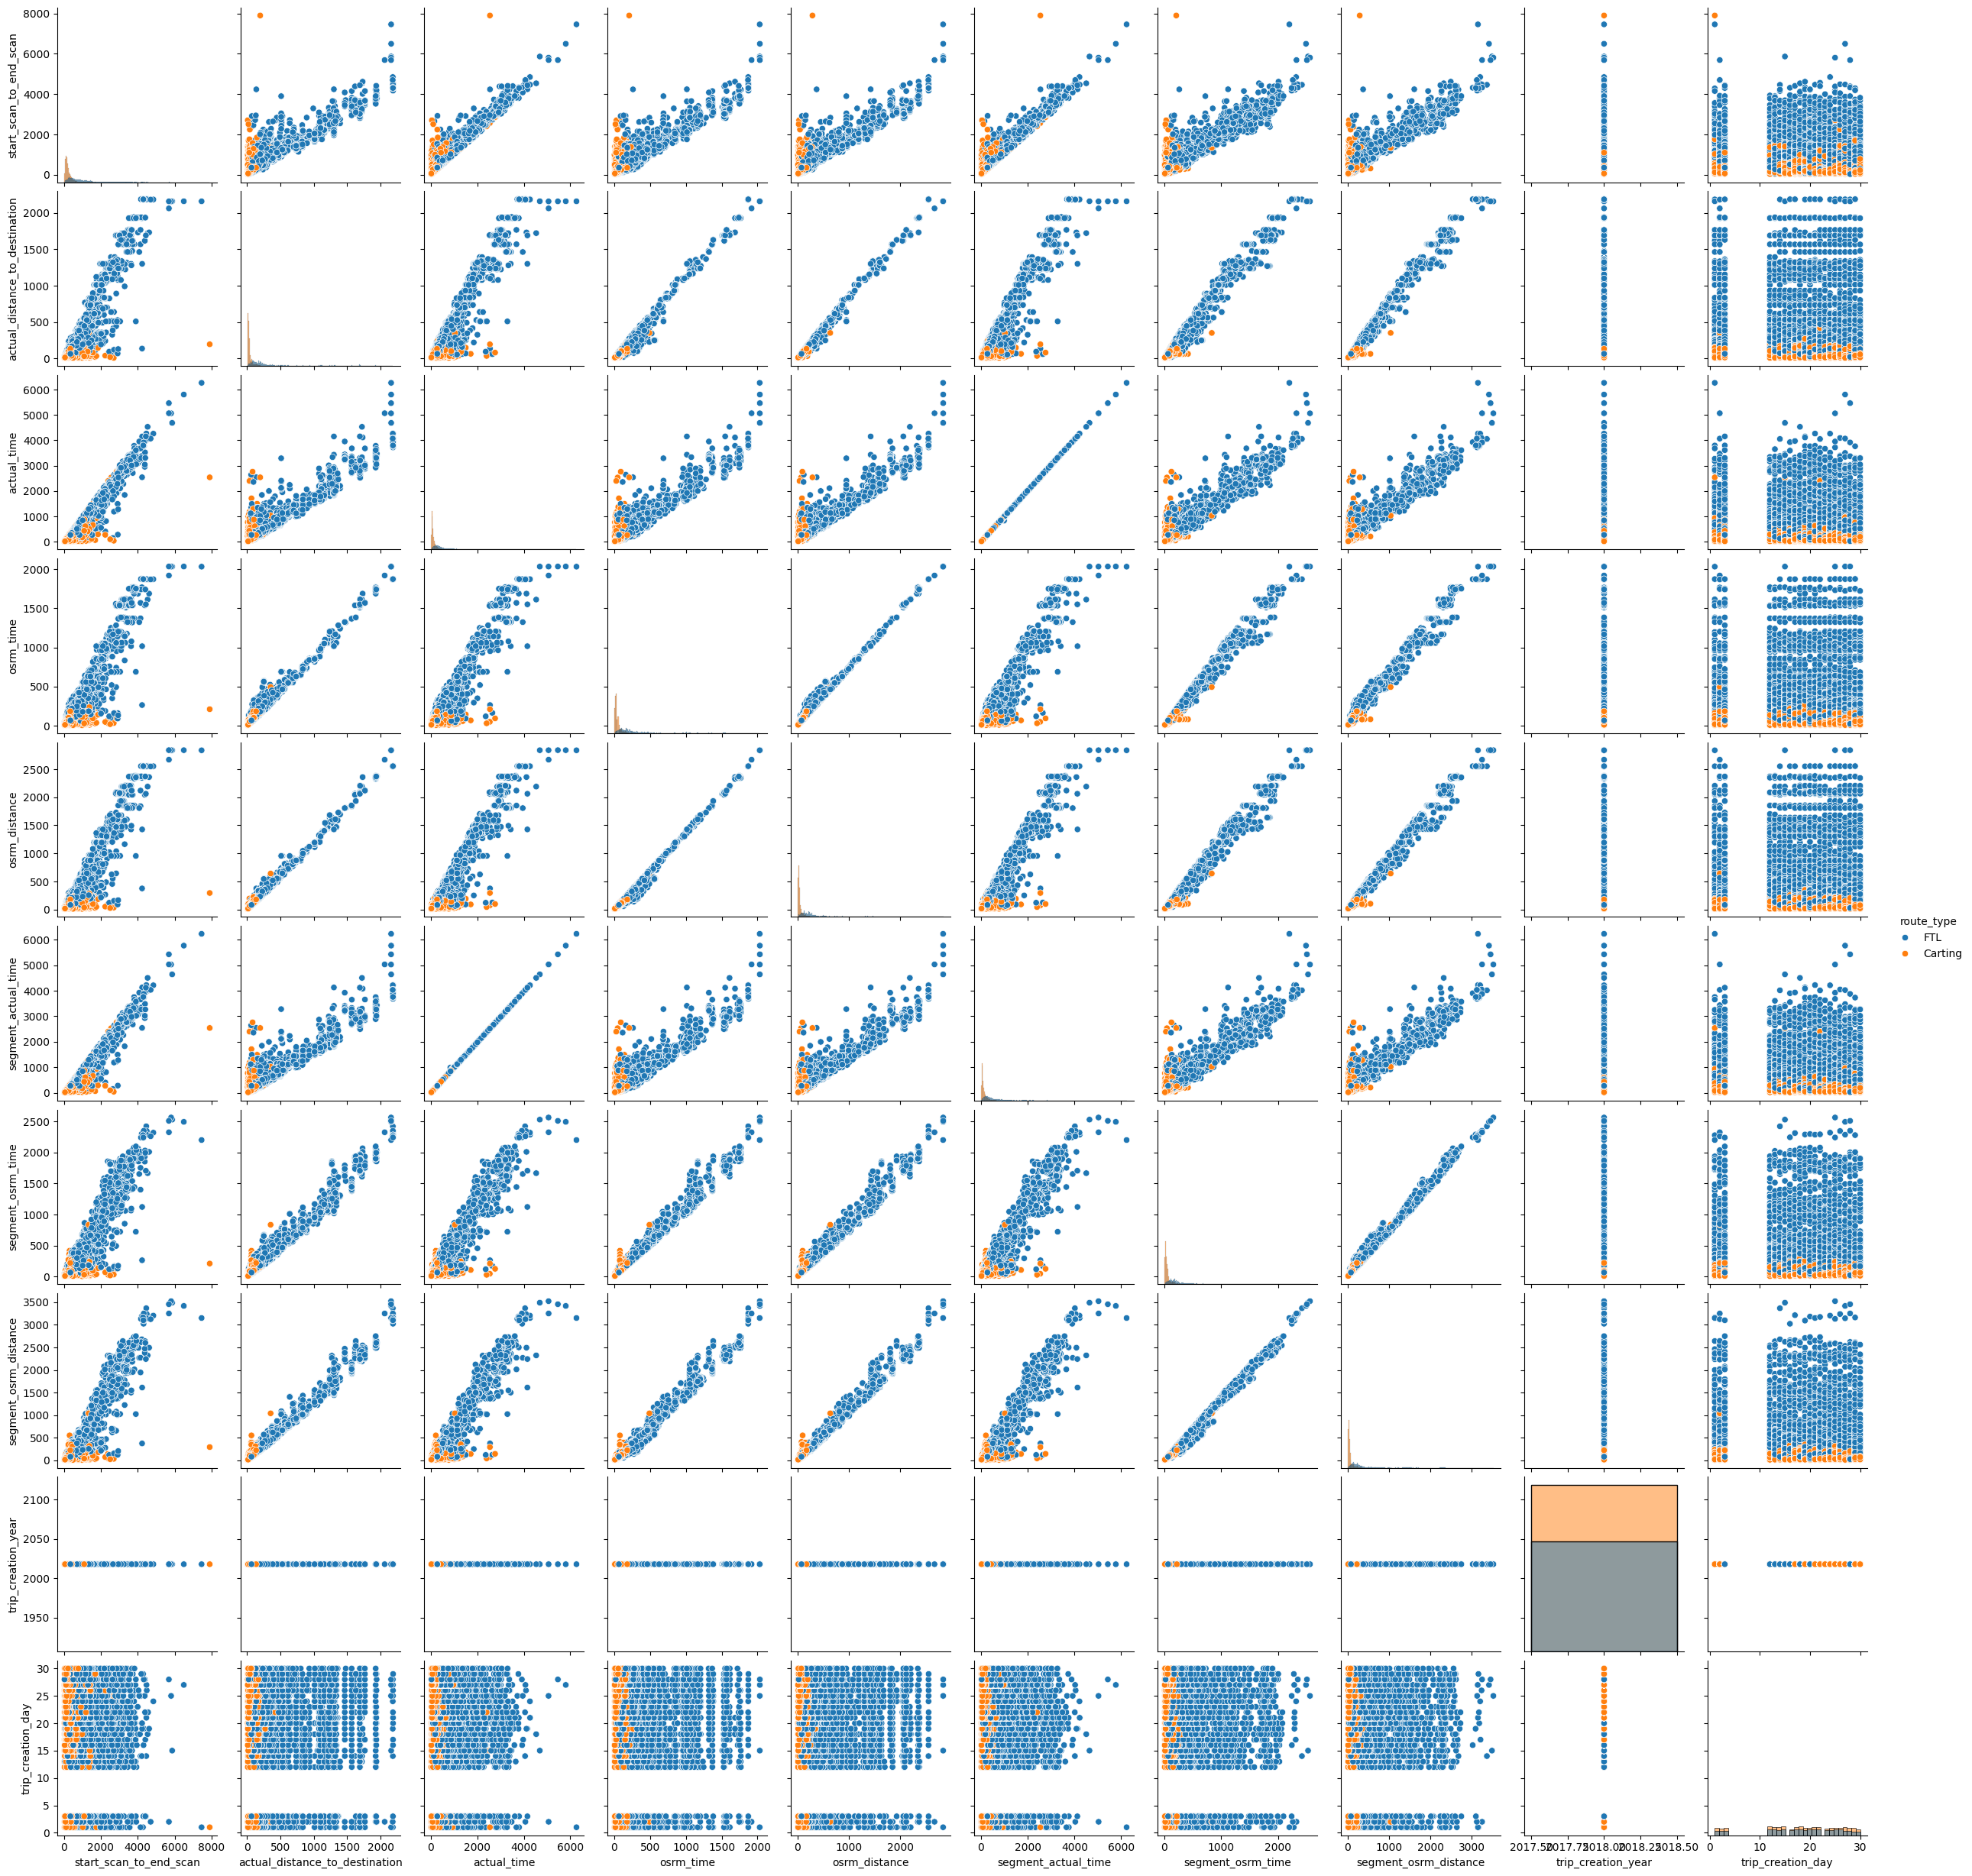

In [ ]:
sns.pairplot(data_final,hue="route_type", diag_kind="hist")

##State with many source centers

<Axes: xlabel='source_state'>

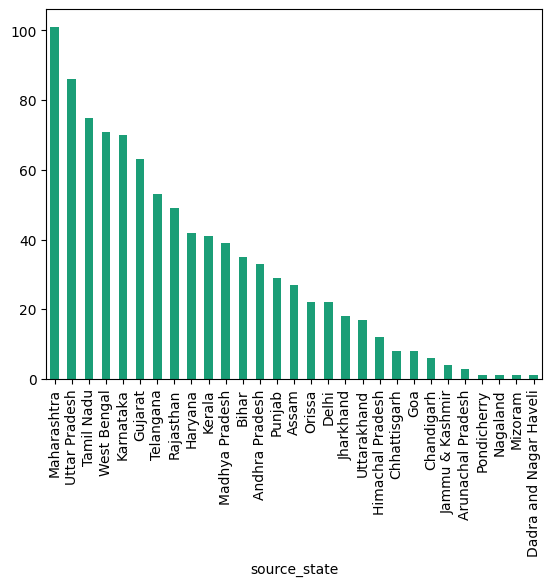

In [ ]:
data_final.groupby('source_state')['source_center'].nunique().sort_values(ascending=False).plot(kind='bar',colormap='Dark2')

*  Maharashtra has more source centers compared to other states
*  Followed by UP , Tamil Nadu , West Bengal and Karnataka

##State with many destination centers

<Axes: xlabel='dest_state'>

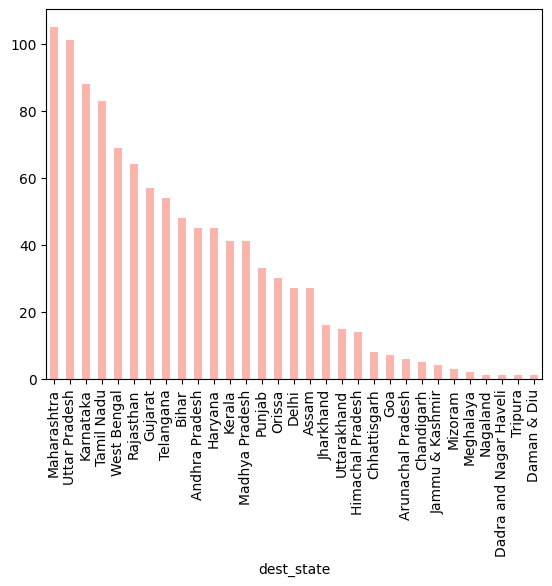

In [ ]:
data_final.groupby('dest_state')['destination_center'].nunique().sort_values(ascending=False).plot(kind='bar',colormap='Pastel1')

*  Maharashtra has more destination centers compared to other states
*  Followed by UP ,Karnataka , Tamil Nadu and West Bengal

##Day of the week with most number of deliveries

In [ ]:
data_final['dayofweek'] = data_final['trip_creation_time'].dt.day_name()
b= data_final['dayofweek'].value_counts().to_frame('count').reset_index()
b

dayofweek  count
0  Wednesday   2739
1   Saturday   2130
2   Thursday   2106
3     Friday   2060
4    Tuesday   2040
5     Monday   1987
6     Sunday   1755

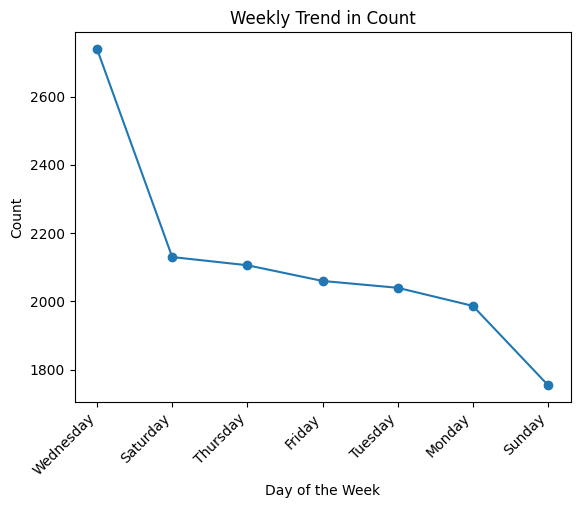

In [ ]:
plt.plot(b['dayofweek'], b['count'], marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Weekly Trend in Count')
_ = plt.xticks(rotation=45, ha='right')

*  Most of the deliveries are done on wednesday
*  Saturday , Thursday, Friday , Tuesday almost have the same share
*  Sunday being the day with least number of deliveries

##Actual Time v/s ORSM Time

In [ ]:
c=data_final.groupby('source_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
c=pd.melt(c, id_vars=['source_state'], value_vars=['actual_time', 'osrm_time'])
c

source_state     variable        value
0           Andhra Pradesh  actual_time   398.435484
1        Arunachal Pradesh  actual_time   429.250000
2                    Assam  actual_time   540.171642
3                    Bihar  actual_time   492.645714
4               Chandigarh  actual_time   168.741935
5             Chhattisgarh  actual_time   174.139535
6   Dadra and Nagar Haveli  actual_time    48.333333
7                    Delhi  actual_time   230.550824
8                      Goa  actual_time   540.138462
9                  Gujarat  actual_time   331.470667
10                 Haryana  actual_time   638.527508
11        Himachal Pradesh  actual_time   891.088235
12         Jammu & Kashmir  actual_time   237.235294
13               Jharkhand  actual_time   498.981250
14               Karnataka  actual_time   216.933738
15                  Kerala  actual_time   247.173010
16          Madhya Pradesh  actual_time   559.406940
17             Maharashtra  actual_time   296.011054
18                 Mizoram  actual_time  1427.000000
19                Nagaland  actual_time   494.600000
20                  Orissa  actual_time   332.308411
21             Pondicherry  actual_time   462.416667
22                  Punjab  actual_time   329.917910
23               Rajasthan  actual_time   427.264591
24              Tamil Nadu  actual_time   158.486044
25               Telangana  actual_time   304.624840
26           Uttar Pradesh  actual_time   402.257218
27             Uttarakhand  actual_time   397.728070
28             West Bengal  actual_time   465.124812
29          Andhra Pradesh    osrm_time   201.670507
30       Arunachal Pradesh    osrm_time    78.750000
31                   Assam    osrm_time   204.085821
32                   Bihar    osrm_time   142.431429
33              Chandigarh    osrm_time    64.215054
34            Chhattisgarh    osrm_time    83.906977
35  Dadra and Nagar Haveli    osrm_time    13.733333
36                   Delhi    osrm_time   100.934066
37                     Goa    osrm_time   257.276923
38                 Gujarat    osrm_time   166.368000
39                 Haryana    osrm_time   317.956311
40        Himachal Pradesh    osrm_time   221.852941
41         Jammu & Kashmir    osrm_time   104.352941
42               Jharkhand    osrm_time   215.600000
43               Karnataka    osrm_time   108.295847
44                  Kerala    osrm_time   125.650519
45          Madhya Pradesh    osrm_time   258.952681
46             Maharashtra    osrm_time   127.739499
47                 Mizoram    osrm_time   229.000000
48                Nagaland    osrm_time    80.200000
49                  Orissa    osrm_time   124.411215
50             Pondicherry    osrm_time   217.916667
51                  Punjab    osrm_time   152.354478
52               Rajasthan    osrm_time   200.708171
53              Tamil Nadu    osrm_time    83.142445
54               Telangana    osrm_time   143.732394
55           Uttar Pradesh    osrm_time   157.217848
56             Uttarakhand    osrm_time   191.324561
57             West Bengal    osrm_time   167.622556

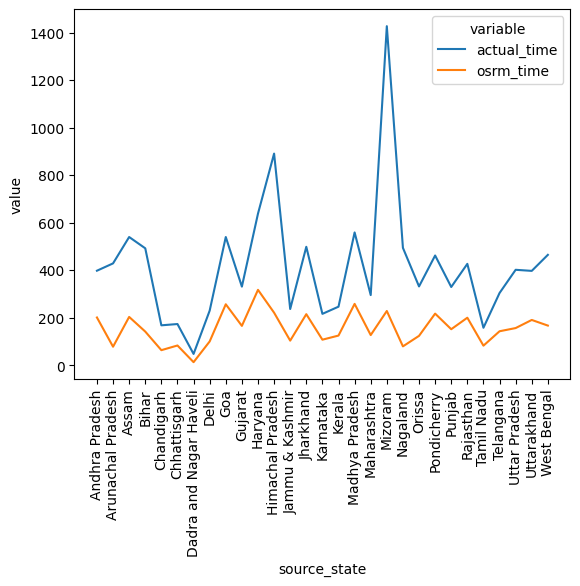

In [ ]:
sns.lineplot(data=c,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

* From the above observation we can say that
    *  In Mizoram we can see there is high variation in actual and osrm time
    *  In Dadra and Nagar Haveli and Tamil Nadu the actual and osrm time are almost equal
    * There is not that much variation in Tamil Nadu also
    * Similarly in case of Haryana and Himachalpradesh also have high variation

## Actual Distance v/s ORSM Distance

In [ ]:
d=data_final.groupby('source_state').agg({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).reset_index()
d=pd.melt(d, id_vars=['source_state'], value_vars=['actual_distance_to_destination', 'osrm_distance'])
d

source_state                        variable       value
0           Andhra Pradesh  actual_distance_to_destination  205.461342
1        Arunachal Pradesh  actual_distance_to_destination   77.150532
2                    Assam  actual_distance_to_destination  193.532247
3                    Bihar  actual_distance_to_destination  153.588085
4               Chandigarh  actual_distance_to_destination   54.811432
5             Chhattisgarh  actual_distance_to_destination   73.734984
6   Dadra and Nagar Haveli  actual_distance_to_destination   14.349976
7                    Delhi  actual_distance_to_destination  100.054953
8                      Goa  actual_distance_to_destination  219.883526
9                  Gujarat  actual_distance_to_destination  175.549300
10                 Haryana  actual_distance_to_destination  341.033423
11        Himachal Pradesh  actual_distance_to_destination  116.370463
12         Jammu & Kashmir  actual_distance_to_destination  105.300217
13               Jharkhand  actual_distance_to_destination  226.406040
14               Karnataka  actual_distance_to_destination  101.412585
15                  Kerala  actual_distance_to_destination   97.875658
16          Madhya Pradesh  actual_distance_to_destination  259.562780
17             Maharashtra  actual_distance_to_destination  137.783489
18                 Mizoram  actual_distance_to_destination  119.774782
19                Nagaland  actual_distance_to_destination   67.510835
20                  Orissa  actual_distance_to_destination  121.063622
21             Pondicherry  actual_distance_to_destination  233.749084
22                  Punjab  actual_distance_to_destination  155.165304
23               Rajasthan  actual_distance_to_destination  211.217983
24              Tamil Nadu  actual_distance_to_destination   73.311371
25               Telangana  actual_distance_to_destination  148.657690
26           Uttar Pradesh  actual_distance_to_destination  154.254277
27             Uttarakhand  actual_distance_to_destination  104.240000
28             West Bengal  actual_distance_to_destination  167.877726
29          Andhra Pradesh                   osrm_distance  255.804854
30       Arunachal Pradesh                   osrm_distance  104.452450
31                   Assam                   osrm_distance  273.490164
32                   Bihar                   osrm_distance  189.872446
33              Chandigarh                   osrm_distance   71.311419
34            Chhattisgarh                   osrm_distance  106.256274
35  Dadra and Nagar Haveli                   osrm_distance   16.592587
36                   Delhi                   osrm_distance  122.053160
37                     Goa                   osrm_distance  306.198908
38                 Gujarat                   osrm_distance  212.907671
39                 Haryana                   osrm_distance  417.080895
40        Himachal Pradesh                   osrm_distance  195.963321
41         Jammu & Kashmir                   osrm_distance  131.068324
42               Jharkhand                   osrm_distance  283.488592
43               Karnataka                   osrm_distance  126.073458
44                  Kerala                   osrm_distance  132.494697
45          Madhya Pradesh                   osrm_distance  333.969259
46             Maharashtra                   osrm_distance  168.249902
47                 Mizoram                   osrm_distance  325.281675
48                Nagaland                   osrm_distance  110.817940
49                  Orissa                   osrm_distance  165.384751
50             Pondicherry                   osrm_distance  266.931242
51                  Punjab                   osrm_distance  189.070016
52               Rajasthan                   osrm_distance  259.339060
53              Tamil Nadu                   osrm_distance   91.682308
54               Telangana                   osrm_distance  185.170089
55           Uttar Pradesh            

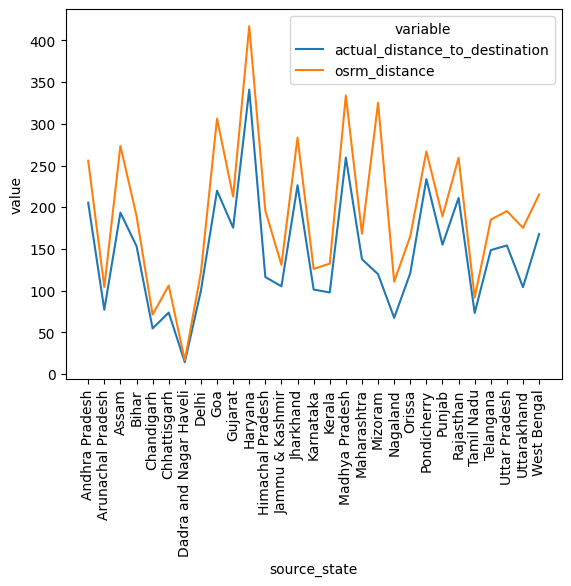

In [ ]:
sns.lineplot(data=d,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

*  From the above observation
  *  Mizoram has the highest difference in actual and orsm distance
  *  Dadar and Nagar haveli actual and orsm distance is equal
  *  Haryana, Goa and Assam also has considereable difference between actual and orsm distance

#Feature Engineering

###Time taken for the Trip to Complete

In [ ]:
df = data_final

In [ ]:
df['total_min_diff']=(df['od_end_time']-df['od_start_time'])/pd.Timedelta(minutes=1)
df

trip_uuid      data         trip_creation_time  \
0      trip-153671041653548748  training 2018-09-12 00:00:16.535741   
1      trip-153671042288605164  training 2018-09-12 00:00:22.886430   
2      trip-153671043369099517  training 2018-09-12 00:00:33.691250   
3      trip-153671046011330457  training 2018-09-12 00:01:00.113710   
4      trip-153671052974046625  training 2018-09-12 00:02:09.740725   
...                        ...       ...                        ...   
14812  trip-153861095625827784      test 2018-10-03 23:55:56.258533   
14813  trip-153861104386292051      test 2018-10-03 23:57:23.863155   
14814  trip-153861106442901555      test 2018-10-03 23:57:44.429324   
14815  trip-153861115439069069      test 2018-10-03 23:59:14.390954   
14816  trip-153861118270144424      test 2018-10-03 23:59:42.701692   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1      thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
2      thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting   
4      thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL   
...                                                  ...        ...   
14812  thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...    Carting   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...    Carting   
14814  thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...    Carting   
14815  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
14816  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   

      source_center                          source_name destination_center  \
0      IND209304AAA   Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA   
1      IND561203AAB    Doddablpur_ChikaDPP_D (Karnataka)       IND561203AAB   
2      IND000000ACB        Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB   
3      IND400072AAB             Mumbai Hub (Maharashtra)       IND401104AAA   
4      IND583101AAA               Bellary_Dc (Karnataka)       IND583119AAA   
...             ...                                  ...                ...   
14812  IND160002AAC       Chandigarh_Mehmdpur_H (Punjab)       IND160002AAC   
14813  IND121004AAB         FBD_Balabhgarh_DPC (Haryana)       IND121004AAA   
14814  IND208006AAA   Kanpur_GovndNgr_DC (Uttar Pradesh)       IND208006AAA   
14815  IND627005AAA  Tirunelveli_VdkkuSrt_I (Tamil Nadu)       IND628204AAA   
14816  IND583119AAA        Sandur_WrdN1DPP_D (Karnataka)       IND583119AAA   

                         destination_name              od_start_time  ...  \
0      Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 16:39:46.858469  ...   
1       Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 02:03:09.655591  ...   
2           Gurgaon_Bilaspur_HB (Haryana) 2018-09-14 03:40:17.106733  ...   
3          Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710  ...   
4           Sandur_WrdN1DPP_D (Karnataka) 2018-09-12 00:02:09.740725  ...   
...                                   ...                        ...  ...   
14812      Chandigarh_Mehmdpur_H (Punjab) 2018-10-03 23:55:56.258533  ...   
14813      Faridabad_Blbgarh_DC (Haryana) 2018-10-03 23:57:23.863155  ...   
14814  Kanpur_GovndNgr_DC (Uttar Pradesh) 2018-10-04 02:51:27.075797  ...   
14815  Tirchchndr_Shnmgprm_D (Tamil Nadu) 2018-10-03 23:59:14.390954  ...   
14816       Sandur_WrdN1DPP_D (Karnataka) 2018-10-04 03:58:40.726547  ...   

                        source   source_state  source_City  source_place  \
0          Kanpur_Central_H_6   Uttar Pradesh       Kanpur       Central   
1       Doddablpur_ChikaDPP_D       Karnataka   Doddablpur      ChikaDPP   
2         Gurgaon_Bilaspur_HB         Haryana      Gurgaon      Bilaspur   
3                  Mumbai Hub     Maharashtra  Mumbai Hub           None   
4                  Bellary_Dc       Karnataka      Bellary   

##Hypothesis Testing

In [ ]:
df[['start_scan_to_end_scan','total_min_diff']]

start_scan_to_end_scan  total_min_diff
0                      2259.0        0.000000
1                       180.0        0.000000
2                      3933.0        0.000000
3                       100.0      100.494935
4                       717.0      232.556228
...                       ...             ...
14812                   257.0      405.485842
14813                    60.0       60.590521
14814                   421.0        0.000000
14815                   347.0      149.831354
14816                   353.0        0.000000

[14817 rows x 2 columns]

###Start scan to end scan and Total minutes difference

* Ho : Mean(start_scan_to_end_scan) = Mean(total_min_difference)
* Ha : Mean(start_scan_to_end_scan) != Mean(total_min_difference)

[]

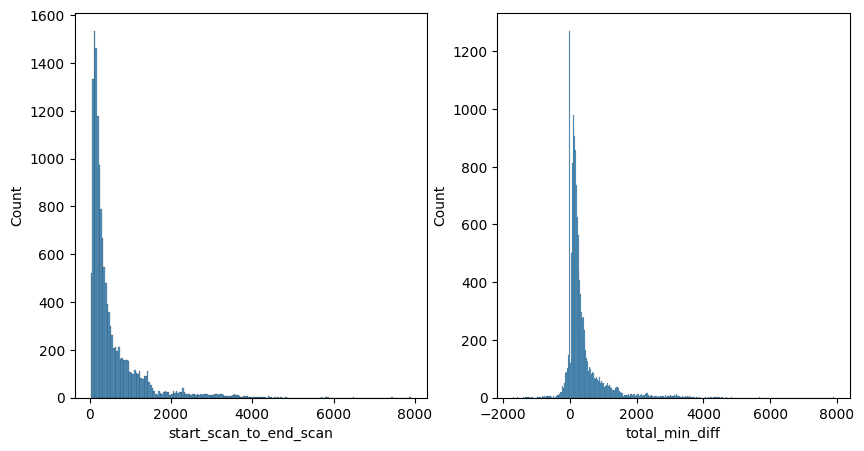

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.histplot(df['start_scan_to_end_scan'])
plt.plot()
plt.subplot(122)
sns.histplot((df['total_min_diff']))
plt.plot()

* We can see that both the graphs are almost similar and are right skewed
* Lets perform log normal on both of the fields and check if we can get a normal distribution

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


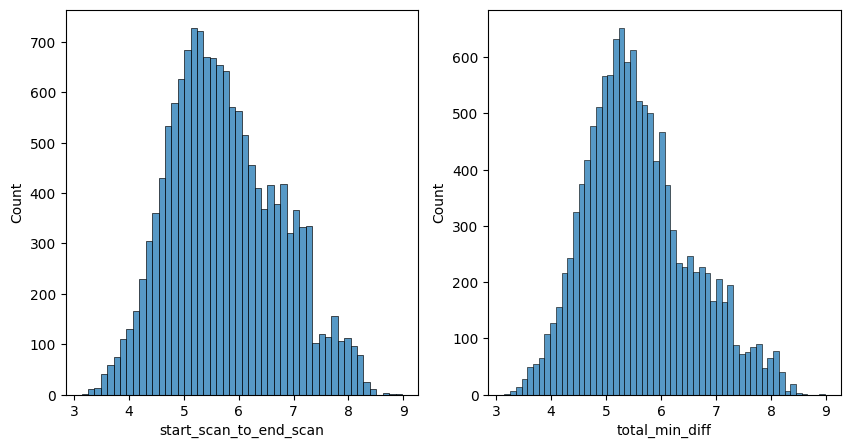

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.histplot(np.log(df['start_scan_to_end_scan']))
plt.plot()
plt.subplot(122)
sns.histplot(np.log(df['total_min_diff']))
plt.plot()
plt.show()

* Even after performing log normal on the values we are not able to achieve a normal distribution

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(df['start_scan_to_end_scan'],df['total_min_diff'])

TtestResult(statistic=22.259490171228443, pvalue=7.138625791028761e-109, df=29632.0)

* From the ttest we have a very large p value = 7.13  indicating that the mean of start_scan_to_end_scan and total_min_diff is significantly different

In [ ]:
observed_mean_difference=np.mean(df['start_scan_to_end_scan'])-np.mean(df['total_min_diff'])
observed_mean_difference

160.16246217165082

* From this analysis we can say that mean of observed_mean_difference inside high.


###Hypothesis testing  between actual_time aggregated value and segment actual time aggregated value

In [ ]:
n=df.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','segment_actual_time':'sum'})
n=n.groupby('trip_uuid').agg({'actual_time':'sum','segment_actual_time':'sum'}).reset_index()
n.rename(columns={'actual_time':'actual_time_agg','segment_actual_time':'segment_actual_time_agg'},inplace=True)
n

trip_uuid  actual_time_agg  segment_actual_time_agg
0      trip-153671041653548748           1562.0                   1548.0
1      trip-153671042288605164            143.0                    141.0
2      trip-153671043369099517           3347.0                   3308.0
3      trip-153671046011330457             59.0                     59.0
4      trip-153671052974046625            341.0                    340.0
...                        ...              ...                      ...
14812  trip-153861095625827784             83.0                     82.0
14813  trip-153861104386292051             21.0                     21.0
14814  trip-153861106442901555            282.0                    281.0
14815  trip-153861115439069069            264.0                    258.0
14816  trip-153861118270144424            275.0                    274.0

[14817 rows x 3 columns]

* Ho : Mean(actual_time_agg) = Mean(segment_actual_time_agg)
* Ha : Mean(actual_time_agg) != Mean(segment_actual_time_agg)

In [ ]:
ttest_ind(n['actual_time_agg'],n['segment_actual_time_agg'])

TtestResult(statistic=0.5008024728897531, pvalue=0.6165138648224772, df=29632.0)

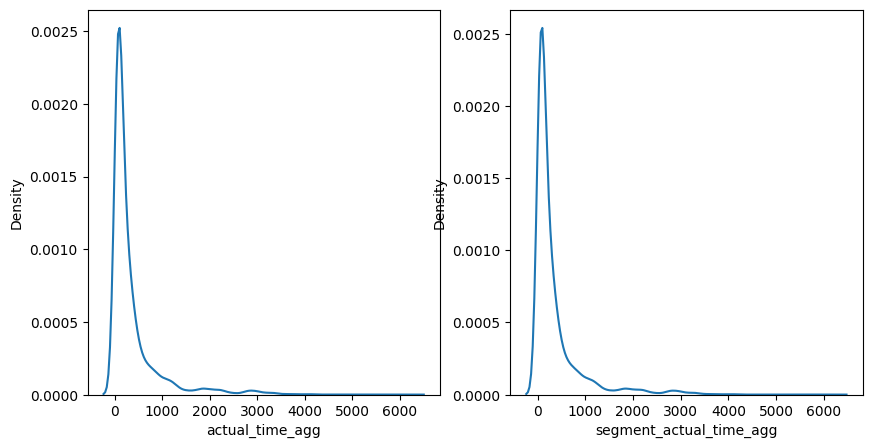

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.kdeplot(n['actual_time_agg'])
plt.plot()
plt.subplot(122)
sns.kdeplot(n['segment_actual_time_agg'])
plt.plot()
plt.show()

*  We have right skewed plot for actual_time_agg and segment_actual_time_agg

In [ ]:
mean_of_time=np.mean(n['actual_time_agg'])-np.mean(n['segment_actual_time_agg'])
mean_of_time

3.251467908483505

* With significance at 5% we can say that the actual_time_agg and segment_actual_time_agg means are not equal

###Hypothesis Testing between orsm time agg and segment orsm time agg

In [ ]:
v=df.groupby(['trip_uuid','source_center']).agg({'osrm_time':'max','segment_osrm_time':'sum'})
v=v.groupby('trip_uuid').agg({'osrm_time':'sum','segment_osrm_time':'sum'}).reset_index()
v.rename(columns={'osrm_time':'osrm_time_agg','segment_osrm_time':'segment_osrm_time_agg'},inplace=True)
v

trip_uuid  osrm_time_agg  segment_osrm_time_agg
0      trip-153671041653548748          743.0                 1008.0
1      trip-153671042288605164           68.0                   65.0
2      trip-153671043369099517         1741.0                 1941.0
3      trip-153671046011330457           15.0                   16.0
4      trip-153671052974046625          117.0                  115.0
...                        ...            ...                    ...
14812  trip-153861095625827784           62.0                   62.0
14813  trip-153861104386292051           12.0                   11.0
14814  trip-153861106442901555           54.0                   88.0
14815  trip-153861115439069069          184.0                  221.0
14816  trip-153861118270144424           68.0                   67.0

[14817 rows x 3 columns]

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(v['osrm_time_agg'], v['segment_osrm_time_agg'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=105959770.000, p=0.000


*  This analyse we can say that mean of observed_mean_difference outside region of the expected or we can it is in rejection region
*  It implies that mean of 'osrm_time_agg' not equal to 'segment_osrm_time_agg'. So rejecting the null hypothesis

###Hypothesis testing on actual_time aggregated value and OSRM time aggregated value  

In [ ]:
x=df.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','osrm_time':'max'})
x=x.groupby('trip_uuid').agg({'actual_time':'sum','osrm_time':'sum'}).reset_index()
x.rename(columns={'actual_time':'actual_time_agg','osrm_time':'osrm_time_agg'},inplace=True)
x

trip_uuid  actual_time_agg  osrm_time_agg
0      trip-153671041653548748           1562.0          743.0
1      trip-153671042288605164            143.0           68.0
2      trip-153671043369099517           3347.0         1741.0
3      trip-153671046011330457             59.0           15.0
4      trip-153671052974046625            341.0          117.0
...                        ...              ...            ...
14812  trip-153861095625827784             83.0           62.0
14813  trip-153861104386292051             21.0           12.0
14814  trip-153861106442901555            282.0           54.0
14815  trip-153861115439069069            264.0          184.0
14816  trip-153861118270144424            275.0           68.0

[14817 rows x 3 columns]

Performing a non parametric test to test if there is any significant difference in mean between the fields

In [ ]:
from scipy import stats
stats.mannwhitneyu(x['actual_time_agg'],x['osrm_time_agg'])

MannwhitneyuResult(statistic=152477900.0, pvalue=0.0)

*  Here we can see that the test statistic is so extreme that it falls outside the range of any expected values under the null hypothesis.

### Hypothesis Testing on osrm distance aggregated value and segment osrm distance aggregated value

In [ ]:
w=df.groupby(['trip_uuid','source_center']).agg({'osrm_distance':'max','segment_osrm_distance':'sum'})
w=w.groupby('trip_uuid').agg({'osrm_distance':'sum','segment_osrm_distance':'sum'}).reset_index()
w.rename(columns={'osrm_distance':'osrm_distance_agg','segment_osrm_distance':'segment_osrm_distance_agg'},inplace=True)
w

trip_uuid  osrm_distance_agg  segment_osrm_distance_agg
0      trip-153671041653548748           991.3523                  1320.4733
1      trip-153671042288605164            85.1110                    84.1894
2      trip-153671043369099517          2372.0852                  2545.2678
3      trip-153671046011330457            19.6800                    19.8766
4      trip-153671052974046625           146.7918                   146.7919
...                        ...                ...                        ...
14812  trip-153861095625827784            73.4630                    64.8551
14813  trip-153861104386292051            16.0882                    16.0883
14814  trip-153861106442901555            63.2841                   104.8866
14815  trip-153861115439069069           177.6635                   223.5324
14816  trip-153861118270144424            80.5787                    80.5787

[14817 rows x 3 columns]

* Ho: The means are equal
* Ha: The means are not equal

Parametric Test

In [ ]:
from scipy.stats import ttest_ind

log_group1 = np.log(w['osrm_distance_agg'] + 1)
log_group2 = np.log(w['segment_osrm_distance_agg'] + 1)

stat, p = ttest_ind(log_group1, log_group2)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same means (fail to reject H0)')
else:
    print('Different means (reject H0)')

Statistics=-4.160, p=0.000
Different means (reject H0)


Non-Parametric Test

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(w['osrm_distance_agg'], w['segment_osrm_distance_agg'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=106546221.000, p=0.000


# Visualizing the outliers and performing IQR to eliminate them in the numerical columns

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                      2259.0                      824.732854       1562.0   
1                       180.0                       73.186911        143.0   
2                      3933.0                     1932.273969       3347.0   
3                       100.0                       17.175274         59.0   
4                       717.0                      127.448500        341.0   
...                       ...                             ...          ...   
14812                   257.0                       57.762332         83.0   
14813                    60.0                       15.513784         21.0   
14814                   421.0                       38.684839        282.0   
14815                   347.0                      134.723836        264.0   
14816                   353.0                       66.081533        275.0   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0          743.0       991.3523               1548.0             1008.0   
1           68.0        85.1110                141.0               65.0   
2         1741.0      2372.0852               3308.0             1941.0   
3           15.0        19.6800                 59.0               16.0   
4          117.0       146.7918                340.0              115.0   
...          ...            ...                  ...                ...   
14812       62.0        73.4630                 82.0               62.0   
14813       12.0        16.0882                 21.0               11.0   
14814       54.0        63.2841                281.0               88.0   
14815      184.0       177.6635                258.0              221.0   
14816       68.0        80.5787                274.0               67.0   

       segment_osrm_distance  trip_creation_year  trip_creation_day  \
0                  1320.4733                2018                 12   
1                    84.1894                2018                 12   
2                  2545.2678                2018                 12   
3                    19.8766                2018                 12   
4                   146.7919                2018                 12   
...                      ...                 ...                ...   
14812                64.8551                2018                  3   
14813                16.0883                2018                  3   
14814               104.8866                2018                  3   
14815               223.5324                2018                  3   
14816                80.5787                2018                  3   

       total_min_diff  
0            0.000000  
1            0.000000  
2            0.000000  
3          100.494935  
4          232.556228  
...               ...  
14812      405.485842  
14813       60.590521  
14814        0.000000  
14815      149.831354  
14816        0.000000  

[14817 rows x 11 columns]

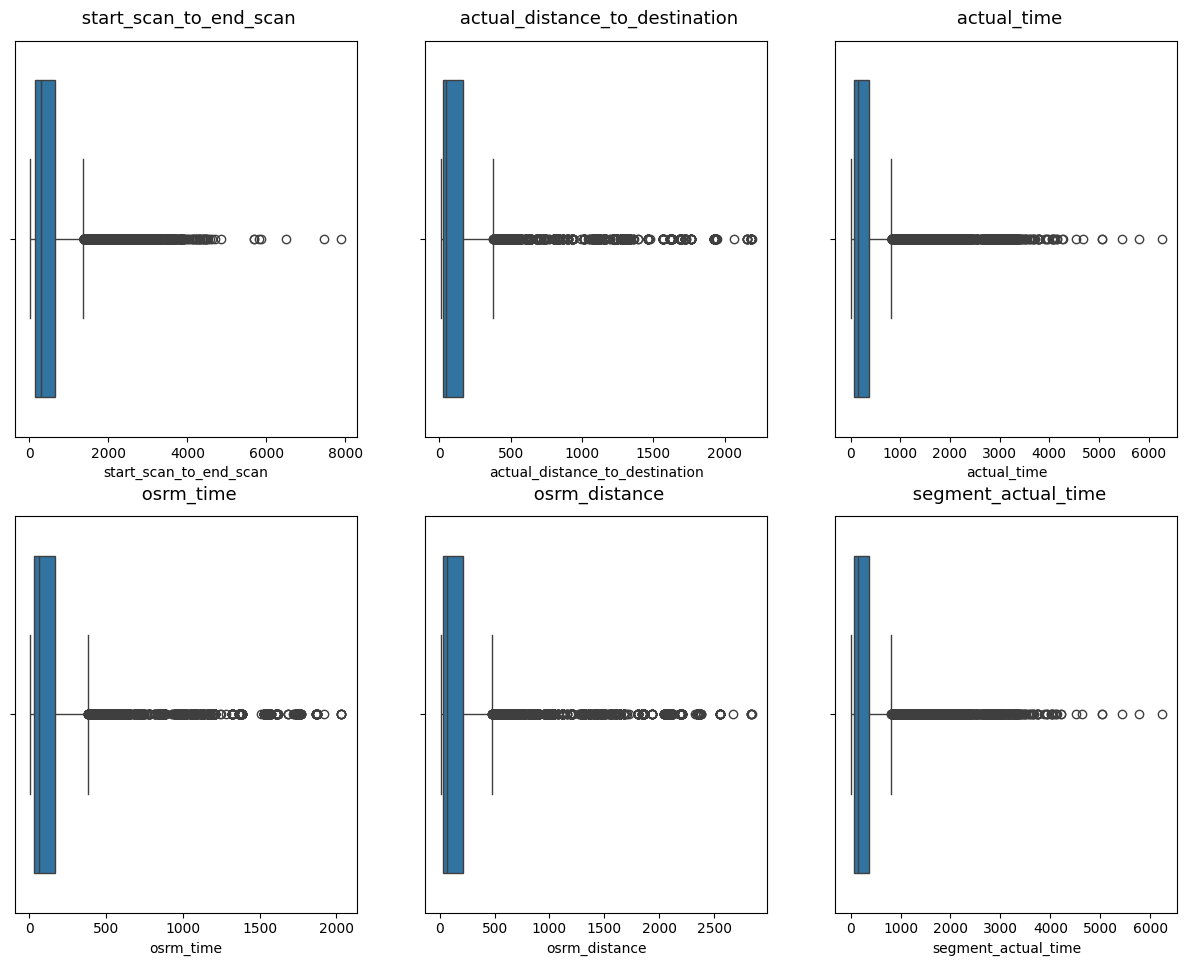

In [ ]:
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(top=1.2)
count = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(data=numerical_df, x=attrs[count], ax=axs[row, col])
        axs[row,col].set_title(f" {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

In [ ]:
ds=df.copy()
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
for i in attrs:
    q1=data[i].quantile(.25)
    q3=data[i].quantile(.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print('lower limit of',i,'=',lower)
    print('upper limit of',i,'=',upper)
    print('----------------------------------------------------------------')
    ds=ds[~((ds[i]<lower)|(ds[i]>upper))]
ds

lower limit of start_scan_to_end_scan = -2048.5
upper limit of start_scan_to_end_scan = 3843.5
----------------------------------------------------------------
lower limit of actual_distance_to_destination = -371.6736259929169
upper limit of actual_distance_to_destination = 681.7383749520162
----------------------------------------------------------------
lower limit of actual_time = -642.0
upper limit of actual_time = 1206.0
----------------------------------------------------------------
lower limit of osrm_time = -318.0
upper limit of osrm_time = 602.0
----------------------------------------------------------------
lower limit of osrm_distance = -440.0031250000001
upper limit of osrm_distance = 813.1110750000001
----------------------------------------------------------------
lower limit of segment_actual_time = -10.0
upper limit of segment_actual_time = 70.0
----------------------------------------------------------------
lower limit of segment_osrm_time = -5.5
upper limit of segm

trip_uuid      data         trip_creation_time  \
3      trip-153671046011330457  training 2018-09-12 00:01:00.113710   
5      trip-153671055416136166  training 2018-09-12 00:02:34.161600   
6      trip-153671066201138152  training 2018-09-12 00:04:22.011653   
7      trip-153671066826362165  training 2018-09-12 00:04:28.263977   
9      trip-153671079956500691  training 2018-09-12 00:06:39.565253   
...                        ...       ...                        ...   
14806  trip-153861075467184898      test 2018-10-03 23:52:34.672136   
14809  trip-153861089872028474      test 2018-10-03 23:54:58.720536   
14810  trip-153861090163768194      test 2018-10-03 23:55:01.637939   
14811  trip-153861091843037040      test 2018-10-03 23:55:18.430664   
14813  trip-153861104386292051      test 2018-10-03 23:57:23.863155   

                                     route_schedule_uuid route_type  \
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting   
5      thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...    Carting   
6      thanos::sroute:a97698cc-846e-41a7-916b-88b1741...    Carting   
7      thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...    Carting   
9      thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...    Carting   
...                                                  ...        ...   
14806  thanos::sroute:adbbfec2-6cbd-43a7-a0b9-4e20f81...    Carting   
14809  thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...    Carting   
14810  thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...    Carting   
14811  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...    Carting   

      source_center                           source_name destination_center  \
3      IND400072AAB              Mumbai Hub (Maharashtra)       IND401104AAA   
5      IND600056AAA      Chennai_Poonamallee (Tamil Nadu)       IND600056AAA   
6      IND600044AAD     Chennai_Chrompet_DPC (Tamil Nadu)       IND600048AAA   
7      IND560043AAC             HBR Layout PC (Karnataka)       IND560043AAC   
9      IND110024AAA               Delhi_Lajpat_IP (Delhi)       IND110014AAA   
...             ...                                   ...                ...   
14806  IND421301AAA  Mumbai_Kalyan West _Dc (Maharashtra)       IND421302AAR   
14809  IND600116AAB        Chennai_Porur_DPC (Tamil Nadu)       IND602001AAA   
14810  IND600056AAA      Chennai_Poonamallee (Tamil Nadu)       IND602105AAB   
14811  IND400072AAB              Mumbai Hub (Maharashtra)       IND401104AAA   
14813  IND121004AAB          FBD_Balabhgarh_DPC (Haryana)       IND121004AAA   

                            destination_name              od_start_time  ...  \
3             Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710  ...   
5           Chennai_Poonamallee (Tamil Nadu) 2018-09-12 02:12:10.755603  ...   
6           Chennai_Vandalur_Dc (Tamil Nadu) 2018-09-12 00:04:22.011653  ...   
7                  HBR Layout PC (Karnataka) 2018-09-12 00:04:28.263977  ...   
9                       Delhi_Bhogal (Delhi) 2018-09-12 00:06:39.565253  ...   
...                                      ...                        ...  ...   
14806         Mumbai_East_I_21 (Maharashtra) 2018-10-04 02:08:07.124942  ...   
14809       Chennai_Thiruvlr_DC (Tamil Nadu) 2018-10-03 23:54:58.720536  ...   
14810  Chennai_Sriperumbudur_Dc (Tamil Nadu) 2018-10-04 02:09:14.276831  ...   
14811         Mumbai_MiraRd_IP (Maharashtra) 2018-10-03 23:55:18.430664  ...   
14813         Faridabad_Blbgarh_DC (Haryana) 2018-10-03 23:57:23.863155  ...   

                        source  source_state     source_City  source_place  \
3                  Mumbai Hub    Maharashtra     Mumbai Hub           None   
5         Chennai_Poonamallee     Tamil Nadu         Chennai  Poonamallee    
6        Chennai_Chrompet_DPC     Tamil Nadu         Chennai      Chrompet   
7               HBR Layout PC      Karnataka  HBR Layout PC           None   
9  

* Out of the 14 thousand rows we had earlier by appliing IQR method to eliminate outliers we have reduced the data to 3400 rows

# Performing one- hot encoding for categorical variables

In [ ]:
df_new = pd.get_dummies(ds, columns=["route_type","data"])
df_new

trip_uuid         trip_creation_time  \
3      trip-153671046011330457 2018-09-12 00:01:00.113710   
5      trip-153671055416136166 2018-09-12 00:02:34.161600   
6      trip-153671066201138152 2018-09-12 00:04:22.011653   
7      trip-153671066826362165 2018-09-12 00:04:28.263977   
9      trip-153671079956500691 2018-09-12 00:06:39.565253   
...                        ...                        ...   
14806  trip-153861075467184898 2018-10-03 23:52:34.672136   
14809  trip-153861089872028474 2018-10-03 23:54:58.720536   
14810  trip-153861090163768194 2018-10-03 23:55:01.637939   
14811  trip-153861091843037040 2018-10-03 23:55:18.430664   
14813  trip-153861104386292051 2018-10-03 23:57:23.863155   

                                     route_schedule_uuid source_center  \
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
5      thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...  IND600056AAA   
6      thanos::sroute:a97698cc-846e-41a7-916b-88b1741...  IND600044AAD   
7      thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...  IND560043AAC   
9      thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...  IND110024AAA   
...                                                  ...           ...   
14806  thanos::sroute:adbbfec2-6cbd-43a7-a0b9-4e20f81...  IND421301AAA   
14809  thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...  IND600116AAB   
14810  thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...  IND600056AAA   
14811  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...  IND121004AAB   

                                source_name destination_center  \
3                  Mumbai Hub (Maharashtra)       IND401104AAA   
5          Chennai_Poonamallee (Tamil Nadu)       IND600056AAA   
6         Chennai_Chrompet_DPC (Tamil Nadu)       IND600048AAA   
7                 HBR Layout PC (Karnataka)       IND560043AAC   
9                   Delhi_Lajpat_IP (Delhi)       IND110014AAA   
...                                     ...                ...   
14806  Mumbai_Kalyan West _Dc (Maharashtra)       IND421302AAR   
14809        Chennai_Porur_DPC (Tamil Nadu)       IND602001AAA   
14810      Chennai_Poonamallee (Tamil Nadu)       IND602105AAB   
14811              Mumbai Hub (Maharashtra)       IND401104AAA   
14813          FBD_Balabhgarh_DPC (Haryana)       IND121004AAA   

                            destination_name              od_start_time  \
3             Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
5           Chennai_Poonamallee (Tamil Nadu) 2018-09-12 02:12:10.755603   
6           Chennai_Vandalur_Dc (Tamil Nadu) 2018-09-12 00:04:22.011653   
7                  HBR Layout PC (Karnataka) 2018-09-12 00:04:28.263977   
9                       Delhi_Bhogal (Delhi) 2018-09-12 00:06:39.565253   
...                                      ...                        ...   
14806         Mumbai_East_I_21 (Maharashtra) 2018-10-04 02:08:07.124942   
14809       Chennai_Thiruvlr_DC (Tamil Nadu) 2018-10-03 23:54:58.720536   
14810  Chennai_Sriperumbudur_Dc (Tamil Nadu) 2018-10-04 02:09:14.276831   
14811         Mumbai_MiraRd_IP (Maharashtra) 2018-10-03 23:55:18.430664   
14813         Faridabad_Blbgarh_DC (Haryana) 2018-10-03 23:57:23.863155   

                     od_end_time  start_scan_to_end_scan  ...  source_code  \
3     2018-09-12 01:41:29.809822                   100.0  ...         None   
5     2018-09-12 02:12:10.755603                   189.0  ...         None   
6     2018-09-12 01:42:22.349694                    98.0  ...         DPC    
7     2018-09-12 03:00:55.163423                   146.0  ...         None   
9     2018-09-12 00:55:59.568645                    49.0  ...          IP    
...                          ...                     ...  ...          ...   
14806 2018-10-04 03:58:31.862972                   110.0  ...          Dc    
14809 2018-10-04 02:57:23.720337                   181.0  ...         DPC    
148

# Normalizing / Standardizing the numerical features

In [ ]:
attr = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time'	,'osrm_time',	'osrm_distance',	'segment_actual_time'	,'segment_osrm_time',	'segment_osrm_distance'	]
from sklearn.preprocessing import StandardScaler

df_to_scale = df_new[attr]
standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df_to_scale)

df_scaled = pd.DataFrame(df_standard, columns=attr)
#df_rest = df_new.drop(attr, axis=1)
#df_combined = pd.concat([df_rest, df_scaled], axis=1)


We are using standard scaler here as we dont the know the end limits and the data has many outliers

In [ ]:
df_new

trip_uuid         trip_creation_time  \
3      trip-153671046011330457 2018-09-12 00:01:00.113710   
5      trip-153671055416136166 2018-09-12 00:02:34.161600   
6      trip-153671066201138152 2018-09-12 00:04:22.011653   
7      trip-153671066826362165 2018-09-12 00:04:28.263977   
9      trip-153671079956500691 2018-09-12 00:06:39.565253   
...                        ...                        ...   
14806  trip-153861075467184898 2018-10-03 23:52:34.672136   
14809  trip-153861089872028474 2018-10-03 23:54:58.720536   
14810  trip-153861090163768194 2018-10-03 23:55:01.637939   
14811  trip-153861091843037040 2018-10-03 23:55:18.430664   
14813  trip-153861104386292051 2018-10-03 23:57:23.863155   

                                     route_schedule_uuid source_center  \
3      thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
5      thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...  IND600056AAA   
6      thanos::sroute:a97698cc-846e-41a7-916b-88b1741...  IND600044AAD   
7      thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...  IND560043AAC   
9      thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...  IND110024AAA   
...                                                  ...           ...   
14806  thanos::sroute:adbbfec2-6cbd-43a7-a0b9-4e20f81...  IND421301AAA   
14809  thanos::sroute:27463ea7-5903-4530-92e7-6a4feca...  IND600116AAB   
14810  thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...  IND600056AAA   
14811  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
14813  thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...  IND121004AAB   

                                source_name destination_center  \
3                  Mumbai Hub (Maharashtra)       IND401104AAA   
5          Chennai_Poonamallee (Tamil Nadu)       IND600056AAA   
6         Chennai_Chrompet_DPC (Tamil Nadu)       IND600048AAA   
7                 HBR Layout PC (Karnataka)       IND560043AAC   
9                   Delhi_Lajpat_IP (Delhi)       IND110014AAA   
...                                     ...                ...   
14806  Mumbai_Kalyan West _Dc (Maharashtra)       IND421302AAR   
14809        Chennai_Porur_DPC (Tamil Nadu)       IND602001AAA   
14810      Chennai_Poonamallee (Tamil Nadu)       IND602105AAB   
14811              Mumbai Hub (Maharashtra)       IND401104AAA   
14813          FBD_Balabhgarh_DPC (Haryana)       IND121004AAA   

                            destination_name              od_start_time  \
3             Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00.113710   
5           Chennai_Poonamallee (Tamil Nadu) 2018-09-12 02:12:10.755603   
6           Chennai_Vandalur_Dc (Tamil Nadu) 2018-09-12 00:04:22.011653   
7                  HBR Layout PC (Karnataka) 2018-09-12 00:04:28.263977   
9                       Delhi_Bhogal (Delhi) 2018-09-12 00:06:39.565253   
...                                      ...                        ...   
14806         Mumbai_East_I_21 (Maharashtra) 2018-10-04 02:08:07.124942   
14809       Chennai_Thiruvlr_DC (Tamil Nadu) 2018-10-03 23:54:58.720536   
14810  Chennai_Sriperumbudur_Dc (Tamil Nadu) 2018-10-04 02:09:14.276831   
14811         Mumbai_MiraRd_IP (Maharashtra) 2018-10-03 23:55:18.430664   
14813         Faridabad_Blbgarh_DC (Haryana) 2018-10-03 23:57:23.863155   

                     od_end_time  start_scan_to_end_scan  ...  source_code  \
3     2018-09-12 01:41:29.809822                   100.0  ...         None   
5     2018-09-12 02:12:10.755603                   189.0  ...         None   
6     2018-09-12 01:42:22.349694                    98.0  ...         DPC    
7     2018-09-12 03:00:55.163423                   146.0  ...         None   
9     2018-09-12 00:55:59.568645                    49.0  ...          IP    
...                          ...                     ...  ...          ...   
14806 2018-10-04 03:58:31.862972                   110.0  ...          Dc    
14809 2018-10-04 02:57:23.720337                   181.0  ...         DPC    
148

In [ ]:
df_scaled

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  -0.312741                       -0.179301     0.971591   
1                   0.465484                        0.848418     1.108354   
2                  -0.330229                       -1.297443    -1.421767   
3                   0.089488                        0.547538     1.313499   
4                  -0.758691                       -1.190592    -1.490148   
...                      ...                             ...          ...   
3417               -0.225300                       -1.184000    -0.737950   
3418                0.395532                        1.182677     1.176736   
3419               -0.679994                       -0.461824    -0.190897   
3420               -0.417670                       -0.098298    -0.464424   
3421               -0.662505                       -0.409374    -1.626912   

      osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     -0.857781      -0.445341             1.017223          -0.758705   
1      0.184547       0.528783             1.086392           0.127141   
2     -1.118363      -1.335456            -1.403697          -1.138353   
3      1.617749       0.628185             1.363069           1.519185   
4     -1.769818      -1.569486            -1.472866          -1.011804   
...         ...            ...                  ...                ...   
3417  -1.509236      -1.295386            -0.712005          -1.644551   
3418   0.836002       1.716362             1.155561           1.392635   
3419  -1.248654      -0.891049            -0.227822          -1.391452   
3420  -0.727490      -0.349319            -0.504498          -0.758705   
3421  -1.248654      -0.862632            -1.611204          -1.391452   

      segment_osrm_distance  
0                 -0.494361  
1                  0.446331  
2                 -1.397153  
3                  0.544627  
4                 -0.929845  
...                     ...  
3417              -1.357529  
3418               1.086851  
3419              -0.957693  
3420              -0.421995  
3421              -0.929581  

[3422 rows x 8 columns]

#Business Insights

*  Carting made most of the shipments compared to Full Truck Loads. As Carting is used for short distance and FTL is used for Long distance.
*  * The median time taken in carting 179.0
   * Median time taken in FTL is 703.0
* Majority of the trip creation was done in the month of september starting from 12th while october had only 3 days of trip creation.
* Jharkhand has the highest distance to destination
* Daman and Diu has the smallest actual distance to destination
* The top contributers in states for souce and destination location  are Maharashtra , Karnataka , Haryana , Tamil Nadu which accounts for more than 50%.
* Out of the destinations the Top 10 places , 3 places are from Karnataka (Nelmngla,Bomsndra,KGAirport)
* Bilaspur in Haryana owned the place of most delivered place among whole state

#Recommendations

* Time taken for delivery and total trip time differ the most in Mizoram, Himachal Pradesh and Uttarakhand.So measures need to taken to improve the prediction accuracy helping in doing more deliveries
* The orsm time and distance calculated is accurate for fair number of states , measures need to taken to improve this calculation with better prediction using open source engines
* States with high number of source places could be equipped more route types for faster long distance delivery
* Using routing engine helps to achieve optimum results, then the difference can explained the traffic conditions or distance through major and minor roads
* Hypothesis test performed on the features revealed that the estimated and actual values are not related in most cases.This indicate the chance for error during the formation of optimum estimate values
* Most of the deliveries are done on wednesday. This spike can be handeled better if measures are taken to see that the deliveries are done equally on the ther working day.  